### Import bibliotek

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Wczytanie danych

In [2]:
df = pd.read_csv('data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### Czyszczenie danych ze zbędnych kolumn w dalszej analizie

In [3]:
# Wstępnie eliminuje kolumny związane z pomiarami błędów oraz z najgorszymi wartościami parametrów
columns_to_drop = ['Unnamed: 32', 'id', 'radius_se', 'texture_se', 'perimeter_se', 'area_se',
                   'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 
                   'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 
                   'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 
                   'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']

df.drop(columns=columns_to_drop, inplace=True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


Tabela zawiera teraz tylko te kolumny, które mogą być bardziej bezpośrednio związane z diagnozą i charakterystyką guzów, eliminując te związane z pomiarami błędów oraz najgorszymi wartościami pomiarów


In [5]:
len(df)

569

### Sprawdzam czy są braki danych

In [6]:
df.isna().any()

diagnosis                 False
radius_mean               False
texture_mean              False
perimeter_mean            False
area_mean                 False
smoothness_mean           False
compactness_mean          False
concavity_mean            False
concave points_mean       False
symmetry_mean             False
fractal_dimension_mean    False
dtype: bool

In [7]:
df.isna().sum()

diagnosis                 0
radius_mean               0
texture_mean              0
perimeter_mean            0
area_mean                 0
smoothness_mean           0
compactness_mean          0
concavity_mean            0
concave points_mean       0
symmetry_mean             0
fractal_dimension_mean    0
dtype: int64

### Zamiana etykiett 'M' (złośliwe) na 1 oraz 'B' (łagodne) na 0 w kolumnie 'diagnosis', aby uzyskać wartości numerczne, co ułatwi dalszą analizę i modelowanie danych

In [4]:
df = df.replace({'M': 1, 'B': 0})
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
diagnosis,569.0,0.372583,0.483918,0.00000,0.00000,0.00000,1.00000,1.00000
radius_mean,569.0,14.127292,3.524049,6.98100,11.70000,13.37000,15.78000,28.11000
texture_mean,569.0,19.289649,4.301036,9.71000,16.17000,18.84000,21.80000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.79000,75.17000,86.24000,104.10000,188.50000
area_mean,569.0,654.889104,351.914129,143.50000,420.30000,551.10000,782.70000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.05263,0.08637,0.09587,0.10530,0.16340
compactness_mean,569.0,0.104341,0.052813,0.01938,0.06492,0.09263,0.13040,0.34540
concavity_mean,569.0,0.088799,0.079720,0.00000,0.02956,0.06154,0.13070,0.42680
concave points_mean,569.0,0.048919,0.038803,0.00000,0.02031,0.03350,0.07400,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.10600,0.16190,0.17920,0.19570,0.30400


<b>Diagnosis</b> ma średnią wartość na poziomie 0,37, co wskazuje, że w zbiorze jest więcej przypadków łagodnych niż złośliwych. Odchylenia standardowe wynosi 0,48, co potwierdza binarny charakter tej zmiennej

Dla pozostałych kolumn można zaobserwować różnorodne średnie wartości i zakresy (min-max) co sugeruje złożoność danych wskazując na znaczną różnorodność cech 

In [10]:
df.dtypes

diagnosis                   int64
radius_mean               float64
texture_mean              float64
perimeter_mean            float64
area_mean                 float64
smoothness_mean           float64
compactness_mean          float64
concavity_mean            float64
concave points_mean       float64
symmetry_mean             float64
fractal_dimension_mean    float64
dtype: object

## Standaryzacja (normalizacja)

Przetwarzanie wstępne - przeskalowanie wartości cech do wspólnego zakresu
Standaryzacja jest szczególnie ważna, gdy cechy mają różne zaakresy wartości (mogliśmy takie zauważyć)

In [5]:
df_s = df.copy()
for column in df_s.columns:
  df_s[column]=(df_s[column]-df_s[column].min())/(df_s[column].max()-df_s[column].min())

df_s.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,1.0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518
1,1.0,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323
2,1.0,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247
3,1.0,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000
4,1.0,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816


In [16]:
df_s.describe().T

,count,mean,std,min,25%,50%,75%,max
diagnosis,569.0,0.372583,0.483918,0.0,0.000000,0.000000,1.000000,1.0
radius_mean,569.0,0.338222,0.166787,0.0,0.223342,0.302381,0.416442,1.0
texture_mean,569.0,0.323965,0.145453,0.0,0.218465,0.308759,0.408860,1.0
perimeter_mean,569.0,0.332935,0.167915,0.0,0.216847,0.293345,0.416765,1.0
area_mean,569.0,0.216920,0.149274,0.0,0.117413,0.172895,0.271135,1.0
smoothness_mean,569.0,0.394785,0.126967,0.0,0.304595,0.390358,0.475490,1.0
compactness_mean,569.0,0.260601,0.161992,0.0,0.139685,0.224679,0.340531,1.0
concavity_mean,569.0,0.208058,0.186785,0.0,0.069260,0.144189,0.306232,1.0
concave points_mean,569.0,0.243137,0.192857,0.0,0.100944,0.166501,0.367793,1.0
symmetry_mean,569.0,0.379605,0.138456,0.0,0.282323,0.369697,0.453030,1.0


Po standaryzacji, wszystkie cecy mają teraz wartości w zakresie od 0 do 1, co ułatwia analizę i modelowanie

Każda z cech zawiera 569 obserwacji - kompletność danych, bez brakujących wartości

Standaryzacja sprawia, że dane są bardziej jednorodne, co ułatwia analizę między różnymi cechami. Dzięki normalizacji żadna cecha nie dominuje nad innymi z powodu różnic w skali co przyczynia się do skuteczniejszego wykorzystywania informacji zawartych w danych przez uczenie maszynowe

# Analiza graficzna danych - wizualizacja

In [10]:
import seaborn as sns

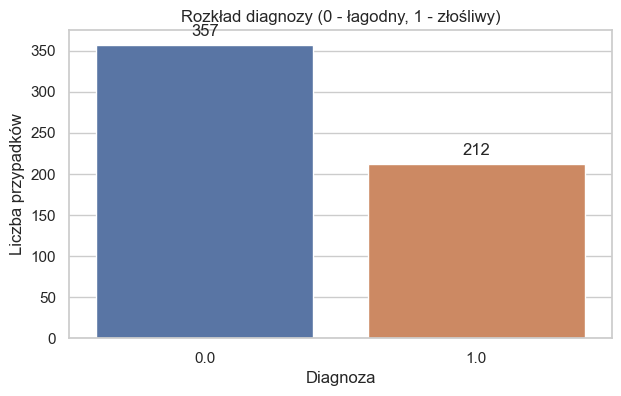

In [11]:
sns.set(style ='whitegrid')

# Wykres rozkładu diagnozy
plt.figure(figsize=(7,4))
ax = sns.countplot(x='diagnosis', data=df_s)
plt.title("Rozkład diagnozy (0 - łagodny, 1 - złośliwy)")
plt.xlabel('Diagnoza')
plt.ylabel('Liczba przypadków')

# Dodanie etykiet z dokładną ilością wyników dla każdej kategorii
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

Wykres przedstawia liczbę przypadków łagodnych (0) i złośliwych (1) w analizowanym zbiorze danych. Można zauważyć, że liczba przypadków łagodnych jest większa niż złośliwych

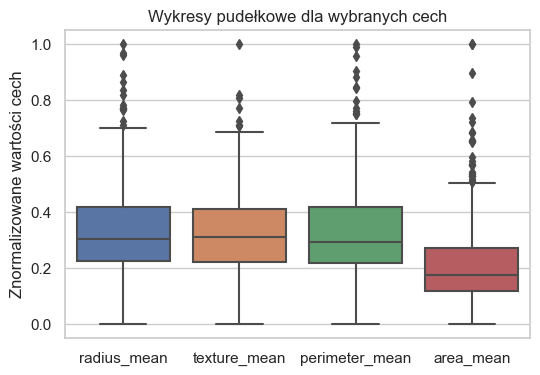

In [29]:
# Wykresy pudełkowe dla pierwszych kilku cech
features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean']
plt.figure(figsize=(6, 4))
sns.boxplot(data=df_s[features])
plt.title('Wykresy pudełkowe dla wybranych cech')
plt.ylabel('Znormalizowane wartości cech')
plt.show()

Wykres pudełkowy dla pierwszych kilku cech pokazuje rozkład znormalizowanych wartości tych cech. Wykres przedstawia rozproszenie danych. Dzięki standaryzacji wszystkie cechy są porównywalne na jednym wykresie

Z wykresów można odczytać, że istnieje zmienność między wartościami tych cech, co wskazuje na różnorodność guzów pod względem ich fizycznych cech.

Wartości odstające (punkty poza "wąsami") mogą wskazywać na nietypowe przypadki, które warto zbadać dokładniej

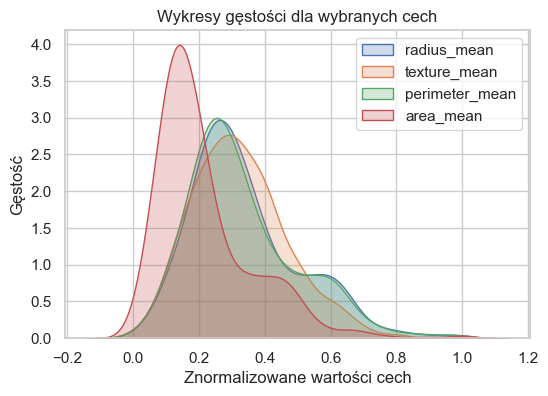

In [31]:
# Wykresy gęstości dla pierwszych kilku cech
plt.figure(figsize=(6, 4))
for feature in features:
    sns.kdeplot(df_s[feature], fill=True, label=feature)
plt.title('Wykresy gęstości dla wybranych cech')
plt.xlabel('Znormalizowane wartości cech')
plt.ylabel('Gęstość')
plt.legend()
plt.show()

Rozkłady promieni (radius) i obwodów (area) wydają się być bardziej symetryczne, kiedy powierzchni (area) wykazuje pewną skośność.

Widać też tendencję cech do grupowania się - wskazuje na podobne wzorce rozkładu - sugeruje wzajemne powiązania

Może warto by było rozważyć analizę rozkładu cech między guzami łagodnymi a złośliwymi czy mają np. tendencję do większych wartości w poszczególnych cechach 

# Korelacja

In [32]:
df_s.corr().T

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,-0.012838
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921


Radius_mean, perimeter_mean, area_mean, concave points_mean - wykazują bardzo silną dodatnią korelację jest to logiczne, ponieważ są to cechy ze sobą powiązane -> dla analizy jeśli korelacje pomiędzy cechami są bardzo wysokie często wystarczy nam tylko jedna z tych cech

Wykazują one również silną dodatnią korelację z diagnosis, co oznacza, że większe wartości tych cech są związane z większym prawdopodobieństwem diagnozy złośliwej

Smoothness_mean (gładkość) i symmetry_mean (symetria) wykazuje również dosyć istotne korelacje z niektórymi cechami geometrycznymi i teksturalnymi guzów

Smoothness wykazuje szczególnie silną korelację z compactness i fractal_dimension co może wskazywać na związki między gładkościa powierzchni guza a jego złożonością strukturalną

"\n#macierz korelacji dla wszystkich cech numerycznych z wykorzystaniem matplotlib\n\ncorr = df_s.corr()\nplt.matshow(corr)\nplt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical')\nplt.yticks(range(len(corr.columns)), corr.columns)\nplt.colorbar()\nplt.show()\n"

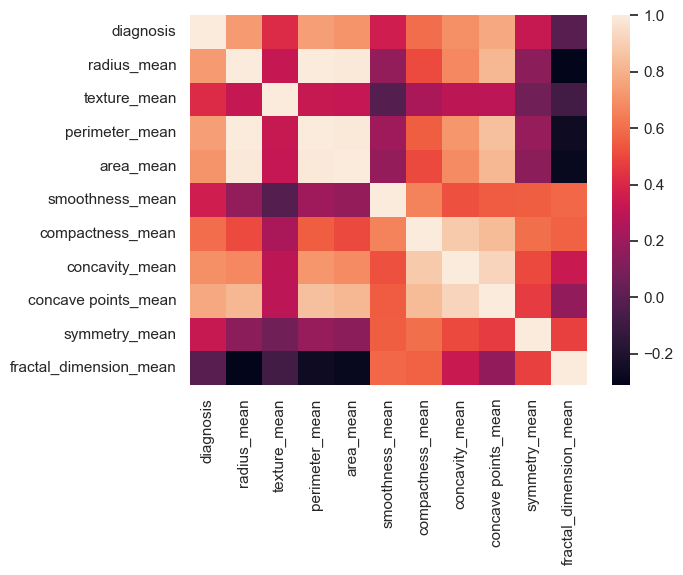

In [15]:
# macierz korelacji dla wszystkich cech numerycznych
corr = df_s.corr()
sns.heatmap(corr)

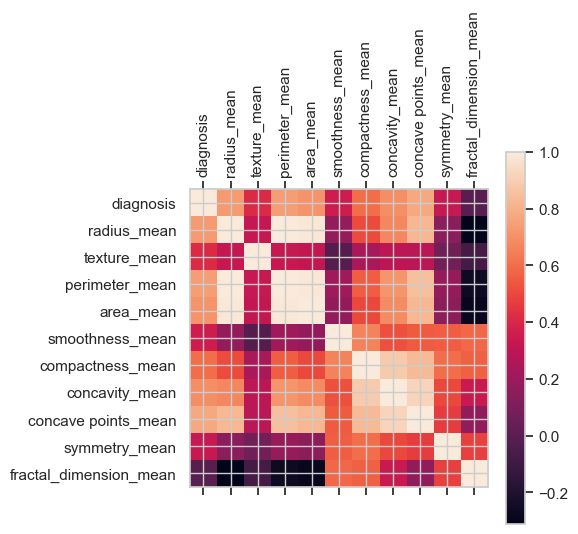

In [16]:
#macierz korelacji dla wszystkich cech numerycznych z wykorzystaniem matplotlib
corr = df_s.corr()
plt.matshow(corr)
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr.columns)), corr.columns)
plt.colorbar()
plt.show()

In [17]:
# jak bardzo zmiana jednej zmiennej jest skorelowana ze zmianą drugiej, niezaleznie od wartości
df_s.corr(method="spearman").T

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
diagnosis,1.000000,0.732785,0.461971,0.748496,0.734122,0.371892,0.609288,0.733308,0.777877,0.332567,-0.025903
radius_mean,0.732785,1.000000,0.340956,0.997802,0.999602,0.148510,0.497578,0.645728,0.759702,0.120242,-0.349931
texture_mean,0.461971,0.340956,1.000000,0.348142,0.344145,0.024649,0.266499,0.342646,0.306891,0.110130,-0.059303
perimeter_mean,0.748496,0.997802,0.348142,1.000000,0.997068,0.182923,0.543925,0.681958,0.788629,0.150049,-0.304891
area_mean,0.734122,0.999602,0.344145,0.997068,1.000000,0.138053,0.488988,0.642557,0.755165,0.113928,-0.358425
smoothness_mean,0.371892,0.148510,0.024649,0.182923,0.138053,1.000000,0.678806,0.518511,0.565172,0.542228,0.588465
compactness_mean,0.609288,0.497578,0.266499,0.543925,0.488988,0.678806,1.000000,0.896518,0.848295,0.552203,0.499195
concavity_mean,0.733308,0.645728,0.342646,0.681958,0.642557,0.518511,0.896518,1.000000,0.927352,0.446793,0.258174
concave points_mean,0.777877,0.759702,0.306891,0.788629,0.755165,0.565172,0.848295,0.927352,1.000000,0.423767,0.142659
symmetry_mean,0.332567,0.120242,0.110130,0.150049,0.113928,0.542228,0.552203,0.446793,0.423767,1.000000,0.428467


Metoda Spearmana bada monotoniczne związki - czy zmiana wartości jednej zmiennej wiąże się z konsekwetną zmianą wartości drugiej zmiennej (niekoniecznie w sposób liniowy)

Szczególnie przydatna, gdy dane są nieliniowe lub zawierają wartości odstające

## WNIOSKI Z KORELACJI METODĄ SPEARMAN
Ponownie widać wyoską korelacji pomiędzy cechami radius, perimeter, area, concavity, concave, co oznacza, że większe wartości tych cech są związane z większym prawdopodobieństwem występowania guza złośliwego. Jest to zgodne z wnioskami z korelacji Pearsona, zdecydowanie te cechy są ważne w różnicowaniu między guzami łagodnymi a złośliwymi

korelacja smoothness i symmetry jest słabsza, co sugeruje mniejsze znaczenie w rozróznianiu między guzami łagodnymi a złośliwymi

fractal_dimension_mean wykazuje generalnie niskie korelacje z innymi cechami oraz nieznaczną ujemną korelację z diagnosis, co wskazuje, że jej związek z innymi cechami i złośliwością guza jest mniej bezpośredni


Metoda Spearmana potwierdza wnioski uzyskane za pomocą korelacji Pearsona

In [18]:
# jak bardzo porządek obserwacji zmiennej jest zgodny z drugiej
df_s.corr(method="kendall").T

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
diagnosis,1.000000,0.599082,0.377644,0.611775,0.599992,0.304033,0.497971,0.599449,0.635873,0.271924,-0.021173
radius_mean,0.599082,1.000000,0.229159,0.963320,0.985565,0.099549,0.340020,0.465087,0.566917,0.081502,-0.246220
texture_mean,0.377644,0.229159,1.000000,0.234353,0.230829,0.017135,0.184220,0.236079,0.209629,0.075493,-0.039255
perimeter_mean,0.611775,0.963320,0.234353,1.000000,0.956965,0.122434,0.375540,0.497587,0.596716,0.101781,-0.214661
area_mean,0.599992,0.985565,0.230829,0.956965,1.000000,0.092541,0.333534,0.461843,0.561760,0.076963,-0.252131
smoothness_mean,0.304033,0.099549,0.017135,0.122434,0.092541,1.000000,0.491072,0.364105,0.398511,0.381515,0.417070
compactness_mean,0.497971,0.340020,0.184220,0.375540,0.333534,0.491072,1.000000,0.719194,0.653022,0.392366,0.345923
concavity_mean,0.599449,0.465087,0.236079,0.497587,0.461843,0.364105,0.719194,1.000000,0.775266,0.311354,0.173476
concave points_mean,0.635873,0.566917,0.209629,0.596716,0.561760,0.398511,0.653022,0.775266,1.000000,0.291970,0.094885
symmetry_mean,0.271924,0.081502,0.075493,0.101781,0.076963,0.381515,0.392366,0.311354,0.291970,1.000000,0.297681


Tutaj wnioski niemalże pokrywają się z poprzednimi, co tylko potwierdza uzyskane wyniki

# PCA
Redukcja wymiarowości danych za pomocą analizy składowych głównych, celując w zmniejszenie liczby cech do dwóch wymiarów, przy jednoczesnym zachowaniu jak największej części wariancji danych

In [21]:
# Importowanie klasy PCA z biblioteki sklearn
from sklearn.decomposition import PCA

# Przygotowanie danych: usuwam kolumnę diagnosis, aby pozostały tylko cechy numeryczne
features = df_s.drop('diagnosis', axis = 1)

In [22]:
# Tworzenie obiektu pca, redukcja jest wykonywana do 2 wymiarów (n_components=2)
pca = PCA(n_components=2)

# Przeprowadzenie metody PCA na wybranych cechach
df_pca = pca.fit_transform(features)

# Tworzenie DataFrame z wynikami PCA, pca_0 i pca_1 reprezentują pierwszą i drugą główną składową
df_pca_df = pd.DataFrame(df_pca, 
                          columns=["pca_0", "pca_1"])

# dodanie informacji o diagnozie do wyników PCA
df_pca_df['diagnosis'] = df_s['diagnosis'].values

# Pobieranie 5 losowo wybranych wierszy, aby zobaczyć przykładowe wartości po redukcji wymiarowości
df_pca_df.sample(n=5)

,pca_0,pca_1,diagnosis
540,-0.204597,0.194126,0.0
19,-0.103445,-0.028878,0.0
133,0.033193,-0.124817,0.0
507,-0.154978,0.419224,0.0
115,-0.261032,0.002476,0.0


Po redukcji wymiarowości, każdy wiersz danych jest teraz reprezentowany przez dwie wartości (pca_0 i pca_1)

Te wartości są nowymi współrzędnymi próbek w przestrzeni zredukowanej do 2 wymiarów

### Wizualizacja danych po przeprowadzeniu PCA

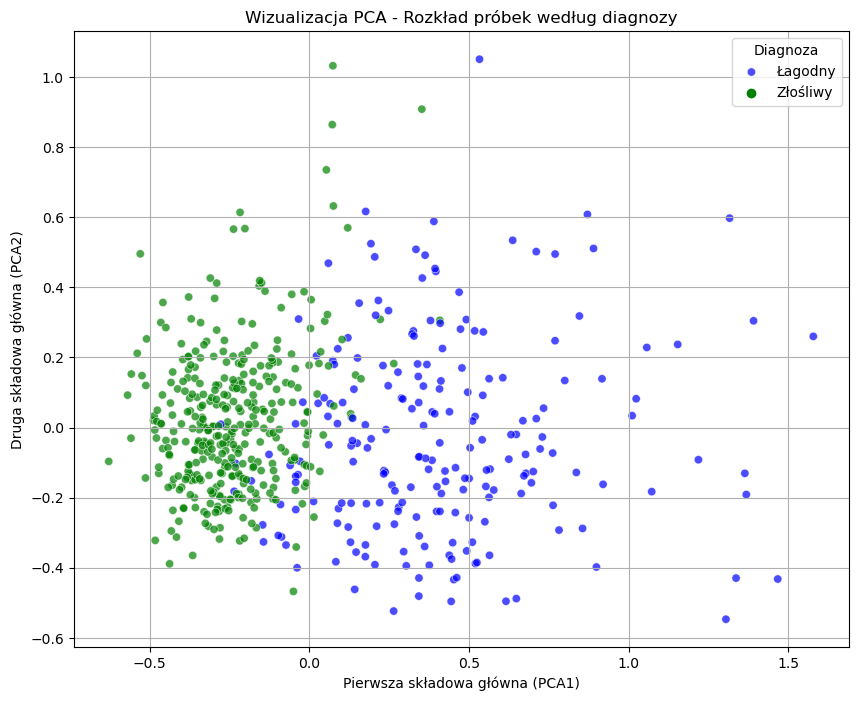

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Wizualizacja wyników PCA 
plt.figure(figsize=(10, 8))
sns.scatterplot(x="pca_0", y="pca_1", hue="diagnosis", data=df_pca_df, 
                palette={0: 'green', 1: 'blue'}, alpha=0.7)
plt.title("Wizualizacja PCA - Rozkład próbek według diagnozy")
plt.xlabel("Pierwsza składowa główna (PCA1)")
plt.ylabel("Druga składowa główna (PCA2)")
plt.legend(title="Diagnoza", labels=['Łagodny', 'Złośliwy'])
plt.grid(True)
plt.show()

<b>Obserwacje z wykresu:</b>
* Istnieje częściowe rozdzielenie między guzami złośliwymi a łagodnymi w przestrzeni dwuwymiarowej, co sugeruje, że PCA może pomóc w klasyfikacji guzów. Istnieje jednak pewne nakładanie się obu kategorii, co wskazuje, że tylko na podstawie tych dwóch składowych nie można dokładnie rozróżnić wszystkich przypadków

* Większość guzów złośliwych skupia się w lewej częsci wykresu

* Guzy łagodne wydają się być bardziej rozproszone, z tendencją do grupowania się po prawej stronie wykresu

<b>Wnioski:</b>
* Wyniki wskazują, że pierwsza składowa ma większą siłę rozróżniającą między guzami łagodnymi a złośliwymi

* Choć istnieje pewne nakładanie się guzów łagodnych i złośliwych, PCA może pomóc w dalszej analizie

# TSNE

In [27]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)

x_tsne = tsne.fit_transform(
    df_s.drop(columns = "diagnosis")
)

df_tsne_df = pd.DataFrame(x_tsne, 
                          columns=["tsne_0", "tsne_1"])

df_tsne_df['diagnosis'] = df_s['diagnosis'].values

df_tsne_df.sample(n=5)

,tsne_0,tsne_1,diagnosis
356,12.787784,-7.140146,0.0
330,18.436434,2.691541,1.0
54,1.262965,15.033927,1.0
207,19.787495,11.267266,1.0
460,15.467259,7.795194,1.0


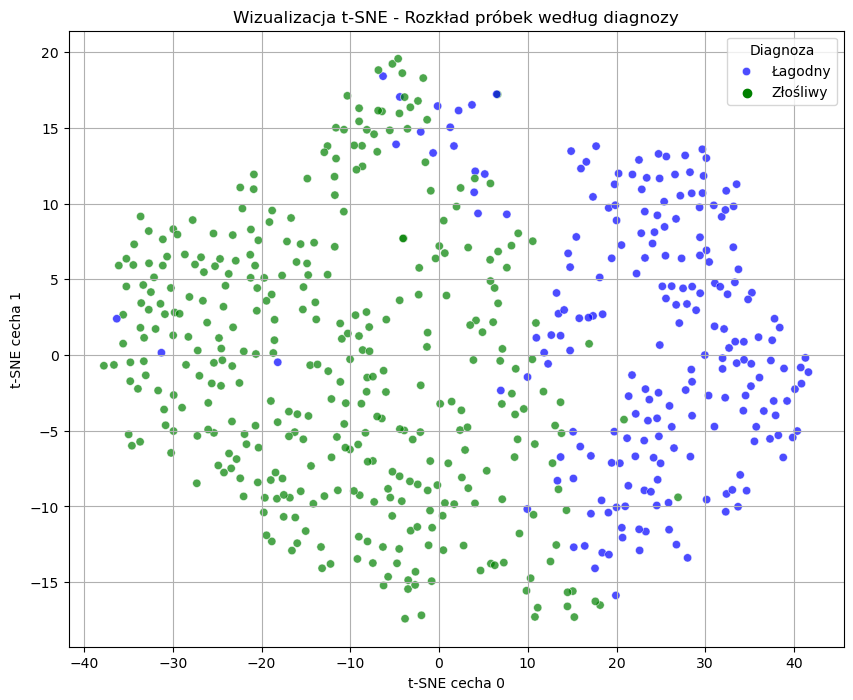

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Wizualizacja wyników t-SNE
plt.figure(figsize = (10, 8))
sns.scatterplot(x='tsne_0', y='tsne_1', hue='diagnosis', data=df_tsne_df,
                palette={0: 'green', 1: 'blue'}, alpha=0.7)
plt.title("Wizualizacja t-SNE - Rozkład próbek według diagnozy")
plt.xlabel("t-SNE cecha 0")
plt.ylabel("t-SNE cecha 1")
plt.legend(title='Diagnoza', labels=['Łagodny', 'Złośliwy'])
plt.grid(True)
plt.show()

<b>Obserwacje z wykresu:</b>

* Podobnie jak po analizie metodą PCA istnieje rozdzielenie między guzami złośliwymi a łągodnymi, zatem t-SNE może pomóc w klasyfikacji guzów

<b>Wnioski:</b>

* Wizualizacja pozwala na identyfikację wzorców i potencjalnych grup w danych

* Choć istnieje pewne nakładanie się próbke z róznymi diagnozami, t-SNE ujawnia obszary, gdzie konkretne klasy diagnoz są bardziej skoncentrowane


# Wizualizacja danych PCA oraz t-SNE

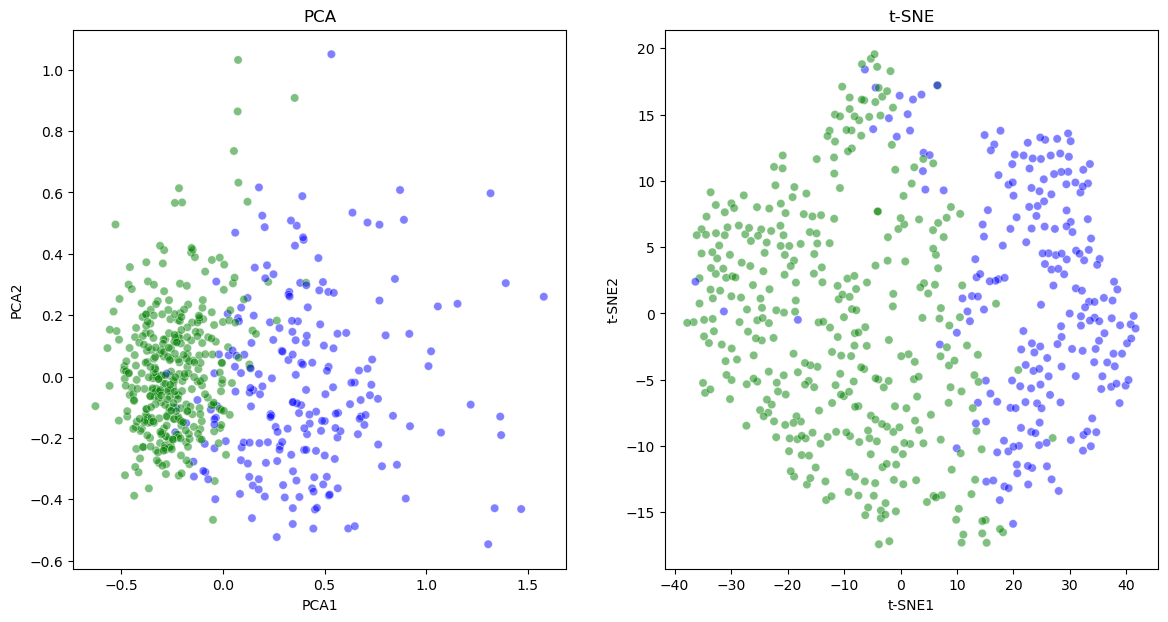

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Wizualizacja wyników PCA i t-SNE obok siebie dla porównania
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Wizualizacja PCA
sns.scatterplot(x="pca_0", y="pca_1", hue="diagnosis", data=df_pca_df, 
                palette={0: 'green', 1: 'blue'}, alpha=0.5, ax=axes[0], legend=False)
axes[0].set_title('PCA')
axes[0].set_xlabel('PCA1')
axes[0].set_ylabel('PCA2')

# Wizualizacja t-SNE
sns.scatterplot(x='tsne_0', y='tsne_1', hue='diagnosis', data=df_tsne_df, 
                palette={0: 'green', 1: 'blue'}, alpha=0.5, ax=axes[1], legend=False)
axes[1].set_title('t-SNE')
axes[1].set_xlabel('t-SNE1')
axes[1].set_ylabel('t-SNE2')

plt.show()


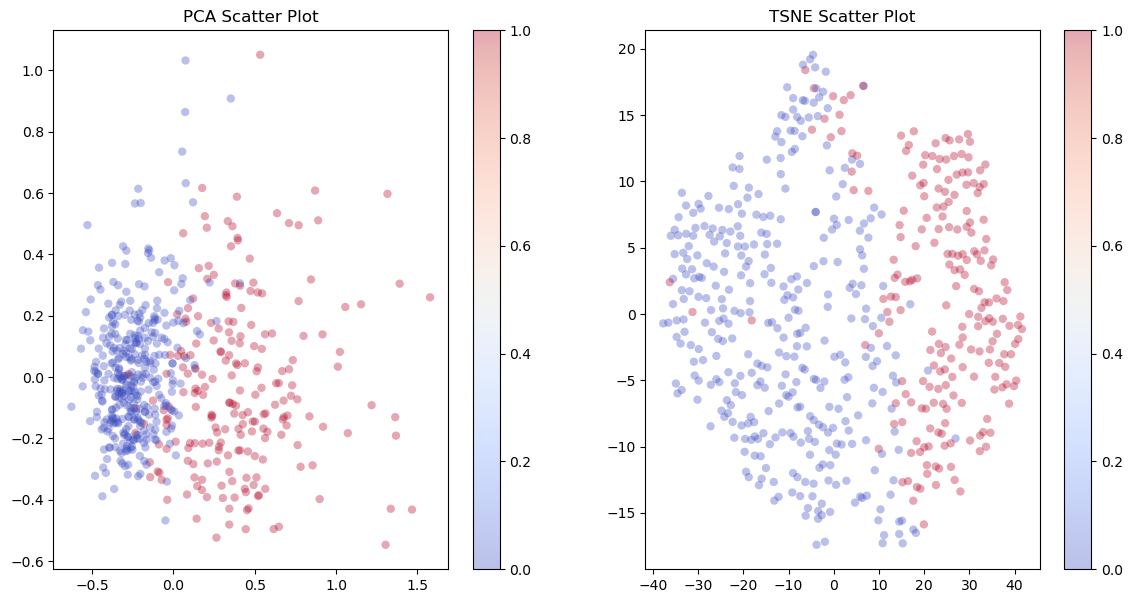

In [35]:
plt.figure(figsize = (14, 7))
plt.subplot(121)
plt.scatter(df_pca_df['pca_0'],df_pca_df['pca_1'], c = df_s['diagnosis'], 
            cmap = "coolwarm", edgecolor = "None", alpha=0.35)
plt.colorbar()
plt.title('PCA Scatter Plot')
plt.subplot(122)
plt.scatter(df_tsne_df['tsne_0'],df_tsne_df['tsne_1'],  c = df_s['diagnosis'], 
            cmap = "coolwarm", edgecolor = "None", alpha=0.35)
plt.colorbar()
plt.title('TSNE Scatter Plot')
plt.show()

<b>Obserwacje:</b>

* Rozkład próbek na wykresie PCA pokazuje pewien stopień rozdzielenia między diagnozami, ale z większym nakładaniem się w porównaniu do t-SNE. 

* PCA koncentruje się na maksymalizacji wariancji, co może nie zawsze odpowiadać najlepszemu rozdzieleniu klas.

* Wizualizacja t-SNE pokazuje wyraźniejsze grupowanie próbek z tą samą diagnozą oraz lepsze rozdzielenie między różnymi diagnozami. 

* t-SNE jest zoptymalizowany do zachowania lokalnych struktur w danych, co często prowadzi do bardziej intuicyjnych wizualizacji podziałów między klasami.

<b>Wnioski:</b>

* Obydwie metody dają wartościowe informacje, jednak t-SNE wydaje się być bardziej skuteczny w rozróżnianiu między różnymi diagnozami

* PCA jest szybsze, t-SNE jest bardziej obciążające obliczeniowo

# Las losowy - Random Forest

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier

# Podzial danych na zestaw treningowy i testowy
X = df_s.drop('diagnosis', axis = 1)
y = df_s['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

# Inicjalizacja i trening modelu lasu losowego
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Predykcja na zestawie testowym
y_pred_rf = rf.predict(X_test)

# Obliczenie macierzy błędów
conf_matrix = confusion_matrix(y_test, y_pred_rf)

# Wyświetlenie macierzy błędów i raportu klasyfikacji
conf_matrix, classification_rep = conf_matrix, classification_report(y_test, y_pred_rf)
print("Macierz błędów:\n", conf_matrix, "\nRaport klasyfikacji:\n", classification_rep)

Macierz błędów:
 [[105   3]
 [  2  61]] 
Raport klasyfikacji:
               precision    recall  f1-score   support

         0.0       0.98      0.97      0.98       108
         1.0       0.95      0.97      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



* 105 TP - guzy łagodne poprawnie zaklasyfikowane
* 61 TN - guzy złośliwe poprawnie zaklasyfikowane
* 3 FN - guzy łagodne błędnie zaklasyfikowane jako złośliwe
* 2 FP - guzy złośliwe błędnie zaklasyfikowane jako łagodne

<b> Wnioski </b>

* Model lasu losowego osiągnął wysoką dokładność (98%) w klasyfikacji guzów
* Wysoka precyzja(precision) oraz czułość (recall) dla obu klas diagnozy sugeruje, że model dobrze radzi sobie z rozróżnianiem między guzami


# Regresja

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Podział danych na zestaw treningowy i testowy
X = df_s.drop('diagnosis', axis = 1)
y = df_s['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Regresja logistyczna
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)

# predykcja
y_pred_lr = lr.predict(X_test)

# dokładność - accuracy
accu = lr.score(X_test, y_test)

# Macierz błędów
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_lr)
classification_rep_log_reg = classification_report(y_test, y_pred_lr)

print("Accuracy:\n", accu)
print("\nMacierz błędów:\n", conf_matrix_log_reg)
print("\nRaport klasyfikacji:\n", classification_rep_log_reg)

Accuracy:
 0.9415204678362573

Macierz błędów:
 [[106   2]
 [  8  55]]

Raport klasyfikacji:
               precision    recall  f1-score   support

         0.0       0.93      0.98      0.95       108
         1.0       0.96      0.87      0.92        63

    accuracy                           0.94       171
   macro avg       0.95      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171



* 106 TP - guzy łagodne poprawnie zaklasyfikowane
* 55 TN - guzy złośliwe poprawnie zaklasyfikowane
* 2 FN - guzy łagodne błędnie zaklasyfikowane jako złośliwe
* 8 FP - guzy złośliwe błędnie zaklasyfikowane jako łagodne

<b> Wnioski </b>

* Precyzja dla klasy łagodnej wyosi 0,93 co wskazuje na wyoską dokładność w przewidywaniu łagodnych guzów jako łagodnych, natomiast dla guzów złośliwych precyzja jest jeszcze wyższa, wynosi 0,96

* Czułość (recall) również na bardzo wysokim poziomie wynoszącym 0,98 pokazując że model jest bardzo skutenczy w identyfikowaniu łagodnych guzów, w przypadku guzów złośliwych wynosi 0,87 - jest mniej skuteczny, co wskazuje na to że model wyłapuje większość przypadków złośliwych

* Mira f1 łączy precyzję i czułość w jedną metrykę. Dla klasy łagodnej 0,95 natomiast dla złośliwej 0,92 - obie wskazują silną wydajność

* Dokładność (accuracy) na poziomie 94,15% potwierdza, że model jest bardzo skuteczny


# KNN

In [64]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Podział danych na zestaw treningowy i testowy
X = df_s.drop('diagnosis', axis = 1)
y = df_s['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# predykcja
y_pred_knn = knn.predict(X_test)

# dokładność
accuracy_knn = accuracy_score(y_test, y_pred_knn) 

# macierz błędów i report klasyfikacji
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
class_report_knn = classification_report(y_test, y_pred_knn)

print("Accuracy:", accuracy_knn, "\nMacierz błędów:\n", conf_matrix_knn, "\nRaport klasyfikacji:\n", class_report_knn)

Accuracy: 0.935672514619883 
Macierz błędów:
 [[103   5]
 [  6  57]] 
Raport klasyfikacji:
               precision    recall  f1-score   support

         0.0       0.94      0.95      0.95       108
         1.0       0.92      0.90      0.91        63

    accuracy                           0.94       171
   macro avg       0.93      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171



Ogólnie model KNN wykazał ponownie silną zdolność do klasyfikacji guzów zarówno łagodnychi złośliwych, z nieco mniejszą dokładnościa niż model regresji logistycznej, ale nadal bardzo wysoką

Wyniki potwierdzają, że KNN jest skuteczny do klasyfikacji na tym zbiorze danych

# SVM

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# zmienne objaśniające i zmienna zależna
X_svm = df_s.drop(columns=['diagnosis'])
y_svm = df_s['diagnosis']

X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(X_svm, y_svm, test_size=0.3)

svm = SVC()
svm.fit(X_train_svm, y_train_svm)

#predykcja
y_pred_svm = svm.predict(X_test_svm)

accuracy_svm = accuracy_score(y_test_svm, y_pred_svm)

# macierz błędów i report klasyfikacji
conf_matrix_svm = confusion_matrix(y_test_svm, y_pred_svm)
class_report_svm = classification_report(y_test_svm, y_pred_svm)

print("Accuracy:", accuracy_svm, "\nMacierz błędów:\n", conf_matrix_svm, "\nRaport klasyfikacji:\n", class_report_svm)

Accuracy: 0.9415204678362573 
Macierz błędów:
 [[107   1]
 [  9  54]] 
Raport klasyfikacji:
               precision    recall  f1-score   support

         0.0       0.92      0.99      0.96       108
         1.0       0.98      0.86      0.92        63

    accuracy                           0.94       171
   macro avg       0.95      0.92      0.94       171
weighted avg       0.94      0.94      0.94       171



Ogólnie model SVVM okazał się bardzo skuteczny w klasyfikacji guzów jako łagodnych lub złośliwych

# Ranking istotności cech

In [70]:
from sklearn.ensemble import RandomForestClassifier

# zmienne objaśniające i zmienna zależna
X = df_s.drop('diagnosis', axis = 1)
y = df_s['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

rf = RandomForestClassifier()
rf.fit(X, y)
importances = rf.feature_importances_

feature_importances = list(zip(X.columns, importances))
feature_importances.sort(key=lambda x: x[1], reverse=True)

#zestawienie istotności cech
for feature, importance in feature_importances:
    print(f"{feature}: {importance}")

concave points_mean: 0.31248811999845216
area_mean: 0.15095298670056537
radius_mean: 0.1396222562465778
concavity_mean: 0.1288288043158575
perimeter_mean: 0.1038232039495461
texture_mean: 0.06331886621483379
compactness_mean: 0.041575847600921687
smoothness_mean: 0.024370469008364773
symmetry_mean: 0.019214663843463493
fractal_dimension_mean: 0.015804782121417227


# Rekurencyjna eliminacja cech z walidacją krzyżową

In [83]:
from sklearn.feature_selection import RFECV

X = df_s.drop('diagnosis', axis = 1)
y = df_s['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

#ranking istotności cech
sel = RFECV(lr, step=1, min_features_to_select=1, cv=5, scoring="f1")
sel.fit(X_train, y_train)

selected_features_df = pd.DataFrame({
    "selected": sel.support_,
    "ranking": sel.ranking_}, index=X.columns)
selected_features_df

,selected,ranking
radius_mean,True,1
texture_mean,True,1
perimeter_mean,True,1
area_mean,True,1
smoothness_mean,True,1
compactness_mean,True,1
concavity_mean,True,1
concave points_mean,True,1
symmetry_mean,True,1
fractal_dimension_mean,False,2


In [84]:
#usuwamy nieistotne dane
df_i = df.copy()
for column in df_i.columns:
  df_i[column]=(df_i[column]-df_i[column].min())/(df_i[column].max()-df_i[column].min())

df_i.drop('fractal_dimension_mean', axis='columns', inplace=True)

df_i.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean
0,1.0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364
1,1.0,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798
2,1.0,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596
3,1.0,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263
4,1.0,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283


PCA dla cech istotnych

In [85]:
from sklearn.decomposition import PCA

df_pca=df_i.drop('diagnosis', axis=1)

pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_pca)

df_pca_df = pd.DataFrame(data=df_pca, columns=['PC1', 'PC2'])
df_pca_df.sample(n=5)

,PC1,PC2
250,0.842195,-0.056555
320,-0.225068,0.208354
102,-0.332056,-0.109880
255,0.047157,0.132284
121,0.386958,-0.075301


<Axes: xlabel='PC1', ylabel='PC2'>

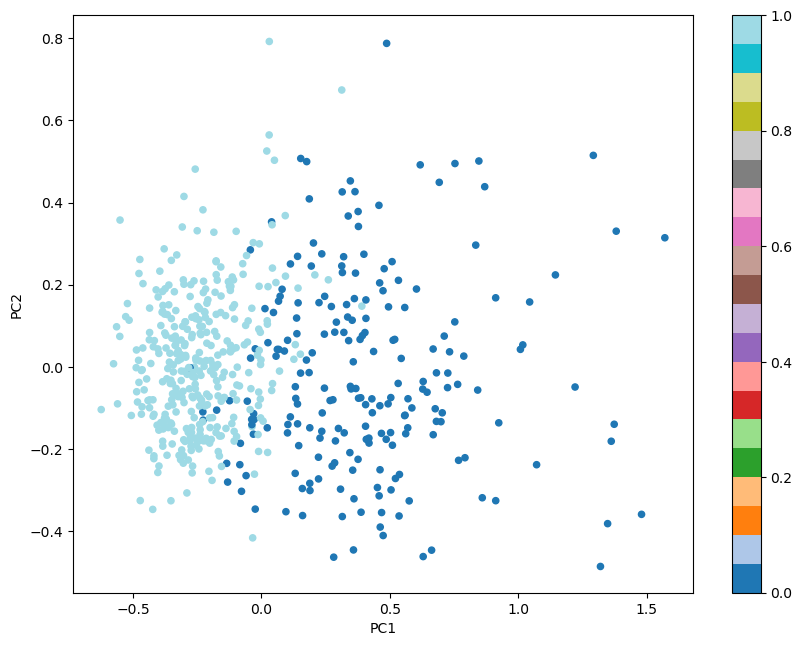

In [87]:
colors, mapping = pd.factorize(df_i["diagnosis"])
colors, mapping
df_pca_df.plot.scatter(x="PC1", y="PC2",
c=colors, cmap="tab20",
figsize=(10.0, 7.5))

In [ ]:
df_i.to_csv('df_i.csv', index=False)